# Importing modules and appending paths

In [2]:
### imports

# external modules
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import os, sys
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../utils/'))
# add the paths to import local modules



# local modules
import get_oms_data
# importlib.reload(get_oms_data)  # not needed unless making live changes to the modules
from get_oms_data import get_oms_api, get_oms_data, get_oms_response_attribute

import json_utils as jsonu
import plot_utils as pu

import mplhep as hep
# import matplotlib as matplot
# plt.style.use(hep.style.cms)
hep.style.use("CMS")

In [3]:
import OMS_RR_utils
importlib.reload(OMS_RR_utils) 
import OMS_RR_utils as omsu

# Very important to initialize the API


In [2]:
# In case you do not need to use the API you can use the csv files
Df_dict={}
Df_dict['runs']= pd.read_csv("2018AEra_runs.csv")
Df_dict['lumisections']= pd.read_csv("Runs_315190-316766_LS.csv")


In [3]:
Df_dict["runs"].tail().run_number

806    316991
807    316993
808    316994
809    316995
810    316998
Name: run_number, dtype: int64

In [4]:
# get the omsapi instance
omsapi = get_oms_api()

## Getting All runs in different eras 2018

Here we define some helper functions to convert the output of the API into pandas dataframes

Here are options for the run attributes
```python
['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field','tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update', 'beamactive_total_deadtime','recorded_lumi', 'delivered_lumi', 'cmssw_version',
'crossing_angle_stop', 'energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'crossing_angle_start', 'fill_type_party2','fill_type_party1', 'beta_star_start', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'clock_type', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam', 'beta_star_stop','hlt_physics_counter']
       
```

`'last_lumisection_number'` (from the `runs` endpoint) refers to the last lumisections where `cms_active` (from the `lumisections` endpoint) is True

In [6]:
# example: get run information for a single run

runnb = (315190,315260) # 2018A
attributes=['components', 'init_lumi','recorded_lumi', 'delivered_lumi','energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'trigger_mode',
'l1_key_stripped', 'fill_type_party2','fill_type_party1', 'initial_prescale_index',
 'sequence', 'hlt_physics_size', 'fill_type_runtime','last_lumisection_number', 'l1_rate','l1_menu', 'run_number', 'stable_beam','hlt_physics_counter']
run_info = get_oms_data( omsapi, 'runs', runnb ,limit_entries=5_000,attributes=attributes)
# print(run_info)

https://vocms0185.cern.ch/agg/api/v1/runs/?fields=run_number,components,l1_key_stripped,l1_hlt_mode,initial_prescale_index,recorded_lumi,l1_rate,hlt_physics_size,fill_type_party2,end_lumi,sequence,fill_type_runtime,init_lumi,trigger_mode,hlt_physics_rate,stable_beam,energy,delivered_lumi,fill_type_party1,hlt_physics_counter,last_lumisection_number,fill_number,l1_menu&filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=5000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=run_number,components,l1_key_stripped,l1_hlt_mode,initial_prescale_index,recorded_lumi,l1_rate,hlt_physics_size,fill_type_party2,end_lumi,sequence,fill_type_runtime,init_lumi,trigger_mode,hlt_physics_rate,stable_beam,energy,delivered_lumi,fill_type_party1,hlt_physics_counter,last_lumisection_number,fill_number,l1_menu&filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=5000


Here we convert the output of the queary into a pandas dataframe

In [10]:
rundf=omsu.makeDF(run_info)
print(rundf.shape)
# rundf[["run_number",'fill_number','last_lumisection_number',]].head()
rundf.head()

(54, 23)


,fill_number,components,l1_hlt_mode,trigger_mode,l1_key_stripped,fill_type_party2,fill_type_party1,initial_prescale_index,sequence,hlt_physics_size,...,l1_rate,l1_menu,run_number,recorded_lumi,delivered_lumi,stable_beam,hlt_physics_counter,energy,end_lumi,hlt_physics_rate
0,6614.0,"[CSC, CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECA...",collisions2018,l1_hlt_collisions2018/v66,collisions2018/v9,PROTON,PROTON,1.0,GLOBAL-RUN,3013.917,...,51943.050,L1Menu_Collisions2018_0_0_1,315190,7.581242,7.945422,True,3739568.0,6499.0,0.0,1394.998
1,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,4.627,...,829.159,L1Menu_Collisions2018_0_0_1,315193,0.000000,0.000000,False,79719.0,0.0,0.0,126.663
2,6615.0,"[CTPPS, DAQ, DCS, DQM, DT, ECAL, ES, HCAL, PIX...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,13.774,...,771.607,L1Menu_Collisions2018_0_0_1,315194,0.000000,0.000000,False,194572.0,0.0,0.0,56.020
3,NaN,"[CTPPS_TOT, DAQ, TCDS]",None,MANUAL,None,None,None,NaN,PRIVATE-GLOBAL-TOTEMCTPPS,NaN,...,NaN,None,315195,NaN,NaN,False,NaN,NaN,NaN,NaN
4,NaN,"[CTPPS_TOT, DAQ, TCDS]",None,MANUAL,None,None,None,NaN,PRIVATE-GLOBAL-TOTEMCTPPS,NaN,...,NaN,None,315196,NaN,NaN,False,NaN,NaN,NaN,NaN


Here we check for the entries that have a `fill_number` and throw away those who do not.

In [11]:
rundf=omsu.has_fill(rundf)
rundf.head()

,fill_number,components,l1_hlt_mode,trigger_mode,l1_key_stripped,fill_type_party2,fill_type_party1,initial_prescale_index,sequence,hlt_physics_size,...,l1_rate,l1_menu,run_number,recorded_lumi,delivered_lumi,stable_beam,hlt_physics_counter,energy,end_lumi,hlt_physics_rate
0,6614.0,"[CSC, CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECA...",collisions2018,l1_hlt_collisions2018/v66,collisions2018/v9,PROTON,PROTON,1.0,GLOBAL-RUN,3013.917,...,51943.050,L1Menu_Collisions2018_0_0_1,315190,7.581242,7.945422,True,3739568.0,6499.0,0.0,1394.998
1,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,4.627,...,829.159,L1Menu_Collisions2018_0_0_1,315193,0.000000,0.000000,False,79719.0,0.0,0.0,126.663
2,6615.0,"[CTPPS, DAQ, DCS, DQM, DT, ECAL, ES, HCAL, PIX...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,13.774,...,771.607,L1Menu_Collisions2018_0_0_1,315194,0.000000,0.000000,False,194572.0,0.0,0.0,56.020
8,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v104,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,0.046,...,664.118,L1Menu_Collisions2018_0_0_1,315201,0.000000,0.000000,False,1538.0,0.0,0.0,9.426
9,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",collisions2018,l1_hlt_collisions2018/v67,collisions2018/v9,PROTON,PROTON,0.0,GLOBAL-RUN,0.004,...,623.238,L1Menu_Collisions2018_0_0_1,315205,0.000000,0.000000,False,15.0,0.0,0.0,0.107


Here we add the `Fill location` column to tell what the run number's place is within a fill, for example 
(5/10) means that it's the 5th run out of 10 runs in the fill.

In [12]:
rundf=omsu.add_loc_wrt_fill(rundf)
rundf.head()

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,fill_number,components,l1_hlt_mode,trigger_mode,l1_key_stripped,fill_type_party2,fill_type_party1,initial_prescale_index,sequence,hlt_physics_size,...,l1_menu,run_number,recorded_lumi,delivered_lumi,stable_beam,hlt_physics_counter,energy,end_lumi,hlt_physics_rate,Fill location
0,6614.0,"[CSC, CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECA...",collisions2018,l1_hlt_collisions2018/v66,collisions2018/v9,PROTON,PROTON,1.0,GLOBAL-RUN,3013.917,...,L1Menu_Collisions2018_0_0_1,315190,7.581242,7.945422,True,3739568.0,6499.0,0.0,1394.998,(1/1)
1,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,4.627,...,L1Menu_Collisions2018_0_0_1,315193,0.000000,0.000000,False,79719.0,0.0,0.0,126.663,(1/42)
2,6615.0,"[CTPPS, DAQ, DCS, DQM, DT, ECAL, ES, HCAL, PIX...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,13.774,...,L1Menu_Collisions2018_0_0_1,315194,0.000000,0.000000,False,194572.0,0.0,0.0,56.020,(2/42)
8,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v104,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,0.046,...,L1Menu_Collisions2018_0_0_1,315201,0.000000,0.000000,False,1538.0,0.0,0.0,9.426,(3/42)
9,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",collisions2018,l1_hlt_collisions2018/v67,collisions2018/v9,PROTON,PROTON,0.0,GLOBAL-RUN,0.004,...,L1Menu_Collisions2018_0_0_1,315205,0.000000,0.000000,False,15.0,0.0,0.0,0.107,(4/42)


## Quick method
This next function does all three previous steps at once

In [13]:
rundf=omsu.convert_check_addFillLoc(run_info)
rundf

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,fill_number,components,l1_hlt_mode,trigger_mode,l1_key_stripped,fill_type_party2,fill_type_party1,initial_prescale_index,sequence,hlt_physics_size,...,l1_menu,run_number,recorded_lumi,delivered_lumi,stable_beam,hlt_physics_counter,energy,end_lumi,hlt_physics_rate,Fill location
0,6614.0,"[CSC, CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECA...",collisions2018,l1_hlt_collisions2018/v66,collisions2018/v9,PROTON,PROTON,1.0,GLOBAL-RUN,3013.917,...,L1Menu_Collisions2018_0_0_1,315190,7.581242,7.945422,True,3739568.0,6499.0,0.000000,1394.998,(1/1)
1,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,4.627,...,L1Menu_Collisions2018_0_0_1,315193,0.000000,0.000000,False,79719.0,0.0,0.000000,126.663,(1/42)
2,6615.0,"[CTPPS, DAQ, DCS, DQM, DT, ECAL, ES, HCAL, PIX...",cosmics2018,l1_hlt_cosmics2018/v103,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,13.774,...,L1Menu_Collisions2018_0_0_1,315194,0.000000,0.000000,False,194572.0,0.0,0.000000,56.020,(2/42)
8,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v104,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,0.046,...,L1Menu_Collisions2018_0_0_1,315201,0.000000,0.000000,False,1538.0,0.0,0.000000,9.426,(3/42)
9,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",collisions2018,l1_hlt_collisions2018/v67,collisions2018/v9,PROTON,PROTON,0.0,GLOBAL-RUN,0.004,...,L1Menu_Collisions2018_0_0_1,315205,0.000000,0.000000,False,15.0,0.0,0.000000,0.107,(4/42)
10,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v104,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,8.699,...,L1Menu_Collisions2018_0_0_1,315206,0.000000,0.000000,False,148063.0,0.0,0.000000,80.402,(5/42)
12,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v104,cosmics2018/v62,PROTON,PROTON,0.0,GLOBAL-RUN,11.105,...,L1Menu_Collisions2018_0_0_1,315210,0.000000,0.000000,False,189028.0,0.0,0.000000,76.502,(6/42)
13,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",cosmics2018,l1_hlt_cosmics2018/v105,cosmics2018/v63,PROTON,PROTON,0.0,GLOBAL-RUN,0.006,...,L1Menu_Collisions2018_0_0_1,315214,0.000000,0.000000,False,315.0,0.0,0.000000,6.757,(7/42)
14,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",circulating2018,l1_hlt_circulating2018/v34,circulating2018/v18,PROTON,PROTON,2.0,GLOBAL-RUN,0.002,...,L1Menu_Collisions2018_0_0_1,315215,0.000000,0.000000,False,7.0,0.0,0.000000,0.060,(8/42)
15,6615.0,"[CTPPS, CTPPS_TOT, DAQ, DCS, DQM, DT, ECAL, ES...",circulating2018,l1_hlt_circulating2018/v34,circulating2018/v18,PROTON,PROTON,2.0,GLOBAL-RUN,0.178,...,L1Menu_Collisions2018_0_0_1,315216,0.000000,0.000000,False,5318.0,0.0,0.000000,3.405,(9/42)


# Some exploration

In [25]:
rundf[["run_number",'fill_number','Fill location','last_lumisection_number',"l1_hlt_mode"]]

,run_number,fill_number,Fill location,last_lumisection_number,l1_hlt_mode
0,315190,6614.0,(1/1),115.0,collisions2018
1,315193,6615.0,(1/42),27.0,cosmics2018
2,315194,6615.0,(2/42),149.0,cosmics2018
8,315201,6615.0,(3/42),7.0,cosmics2018
9,315205,6615.0,(4/42),6.0,collisions2018
10,315206,6615.0,(5/42),79.0,cosmics2018
12,315210,6615.0,(6/42),106.0,cosmics2018
13,315214,6615.0,(7/42),2.0,cosmics2018
14,315215,6615.0,(8/42),9.0,circulating2018
15,315216,6615.0,(9/42),67.0,circulating2018


In [26]:
rundf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 53
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fill_number              44 non-null     float64
 1   components               44 non-null     object 
 2   l1_hlt_mode              44 non-null     object 
 3   trigger_mode             44 non-null     object 
 4   l1_key_stripped          44 non-null     object 
 5   fill_type_party2         44 non-null     object 
 6   fill_type_party1         44 non-null     object 
 7   initial_prescale_index   39 non-null     float64
 8   sequence                 44 non-null     object 
 9   hlt_physics_size         36 non-null     float64
 10  fill_type_runtime        44 non-null     object 
 11  last_lumisection_number  41 non-null     float64
 12  init_lumi                44 non-null     float64
 13  l1_rate                  41 non-null     float64
 14  l1_menu                  44 

Letting Pandas automatically convert the dtypes is optional

## Getting only collision runs

In [16]:
rundf_coll=rundf[rundf['l1_hlt_mode'].str.contains("collisions")]

In [17]:
rundf_coll.shape

(9, 24)

In [19]:
rundf_coll[["run_number",'fill_number','Fill location','last_lumisection_number',"l1_hlt_mode"]]
# to save this dataframe in a csv uncomment below:
# rundf_coll.to_csv("CollisionRuns.csv",index=False)

,run_number,fill_number,Fill location,last_lumisection_number,l1_hlt_mode
0,315190,6614.0,(1/1),115.0,collisions2018
9,315205,6615.0,(4/42),6.0,collisions2018
23,315229,6615.0,(17/42),24.0,collisions2018
34,315240,6615.0,(28/42),6.0,collisions2018
45,315252,6615.0,(38/42),59.0,collisions2018
48,315255,6615.0,(39/42),54.0,collisions2018
50,315257,6615.0,(40/42),92.0,collisions2018
51,315258,6615.0,(41/42),1.0,collisions2018
52,315259,6615.0,(42/42),184.0,collisions2018


Saving the Run queries to a csv **(this is mostly to not oversaturate the API when testing)**

# Lumisections Queries 

Here is the list of attributes available for Lumi queries
```python
['rp_time_ready', 'cscp_ready', 'beam1_present', 'physics_flag',
       'dt0_ready', 'bpix_ready', 'ho_ready', 'dtp_ready', 'tecm_ready',
       'gem_ready', 'lumisection_number', 'tibtid_ready', 'fpix_ready',
       'rpc_ready', 'rp_sect_56_ready', 'castor_ready', 'init_lumi', 'pileup',
       'esp_ready', 'hbhea_ready', 'eep_ready', 'ebm_ready', 'recorded_lumi',
       'delivered_lumi', 'dtm_ready', 'gemp_ready', 'eem_ready', 'end_lumi',
       'fill_number', 'esm_ready', 'tecp_ready', 'gemm_ready', 'ebp_ready',
       'end_time', 'hf_ready', 'rp_sect_45_ready', 'cscm_ready', 'cms_active',
       'zdc_ready', 'start_time', 'hbheb_ready', 'beam1_stable', 'tob_ready',
       'hbhec_ready', 'run_number', 'beam2_stable', 'beam2_present',
 ```

In [7]:
# # get the omsapi instance

# omsapi = get_oms_api()

# example: get run information for a single run

runnb = (315190,315290) # 2018A
attributes = ['fill_number',"run_number",'lumisection_number',"physics_flag","cms_active",
              'bpix_ready','fpix_ready','tecm_ready','tecp_ready','tibtid_ready','tob_ready',
              'pileup','delivered_lumi','recorded_lumi',"init_lumi",'end_lumi',
              'beam1_stable','beam2_stable','beam2_present','beam1_present']

# filters=[{'attribute_name':'fill_number',
#          'value':6000,
#          'operator':'GT'}
#         ]

ls_info = get_oms_data( omsapi, 'lumisections', runnb ,limit_entries=100_000,attributes=attributes,)
#                        extrafilters=filters)

https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=tibtid_ready,beam1_present,init_lumi,lumisection_number,beam1_stable,beam2_present,fill_number,bpix_ready,delivered_lumi,run_number,tecp_ready,physics_flag,fpix_ready,pileup,tob_ready,recorded_lumi,beam2_stable,tecm_ready,end_lumi,cms_active&filter[run_number][GE]=315190&filter[run_number][LE]=315290&page[offset]=0&page[limit]=100000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=tibtid_ready,beam1_present,init_lumi,lumisection_number,beam1_stable,beam2_present,fill_number,bpix_ready,delivered_lumi,run_number,tecp_ready,physics_flag,fpix_ready,pileup,tob_ready,recorded_lumi,beam2_stable,tecm_ready,end_lumi,cms_active&filter[run_number][GE]=315190&filter[run_number][LE]=315290&page[offset]=0&page[limit]=100000


##  Get lumisection queries for individual runs

Since we already know that this queary includes the `fill_number` attribute we can use the quick way of filtering and converting the ouput to a pandas dataframe

In [8]:
ls_df=convert_check_addFillLoc(ls_info)
ls_df.head()


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,fill_number,beam1_present,physics_flag,tecp_ready,bpix_ready,tecm_ready,lumisection_number,cms_active,tibtid_ready,fpix_ready,...,tob_ready,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
0,6614,True,True,True,True,True,1,True,True,True,...,True,0.363444,43.896393,315190,67.803109,74.081656,True,0.363079,True,(1/121)
1,6614,True,True,True,True,True,2,True,True,True,...,True,0.363079,43.852333,315190,67.884234,74.166281,True,0.362664,True,(2/121)
2,6614,True,True,True,True,True,3,True,True,True,...,True,0.362664,43.802155,315190,67.965141,74.250797,True,0.362341,True,(3/121)
3,6614,True,True,True,True,True,4,True,True,True,...,True,0.362341,43.763168,315190,68.019445,74.335195,True,0.362100,True,(4/121)
4,6614,True,True,True,True,True,5,True,True,True,...,True,0.362100,43.734123,315190,68.100352,74.419586,True,0.362182,True,(5/121)


In [9]:
ls_df.shape

(4655, 21)

### You could also use the CSV files available in my local project.
`Runs_315190-316766_LS.csv` has the majority of Era 2018A


In [11]:
ls_df=pd.read_csv("Runs_315190-316766_LS.csv")

In [21]:
ls_df.shape

(99343, 15)

### Again some exploration

In [22]:
ls_df.isna().sum()

fill_number             0
beam1_present           0
physics_flag            0
lumisection_number      0
cms_active              0
beam1_stable            0
init_lumi             101
pileup                103
run_number              0
recorded_lumi         101
delivered_lumi        101
beam2_stable            0
end_lumi              101
beam2_present           0
Fill location           0
dtype: int64

In [23]:
ls_df.nunique()

fill_number              98
beam1_present             2
physics_flag              2
lumisection_number     2298
cms_active                2
beam1_stable              2
init_lumi             58863
pileup                60153
run_number              684
recorded_lumi         53932
delivered_lumi        55092
beam2_stable              2
end_lumi              58862
beam2_present             2
Fill location         98232
dtype: int64

In [32]:
rundf[["last_lumisection_number","run_number","fill_number","Fill location"]]

,last_lumisection_number,run_number,fill_number,Fill location
0,115.0,315190,6614.0,(1/1)
1,27.0,315193,6615.0,(1/42)
2,149.0,315194,6615.0,(2/42)
8,7.0,315201,6615.0,(3/42)
9,6.0,315205,6615.0,(4/42)
10,79.0,315206,6615.0,(5/42)
12,106.0,315210,6615.0,(6/42)
13,2.0,315214,6615.0,(7/42)
14,9.0,315215,6615.0,(8/42)
15,67.0,315216,6615.0,(9/42)


In [40]:
ls_df.tail(10)

,fill_number,beam1_present,physics_flag,tecp_ready,bpix_ready,tecm_ready,lumisection_number,cms_active,tibtid_ready,fpix_ready,...,tob_ready,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
2708,6616,False,False,False,False,False,104,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(124/133)
2709,6616,False,False,False,False,False,105,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(125/133)
2710,6616,False,False,False,False,False,106,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(126/133)
2711,6616,False,False,False,False,False,107,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(127/133)
2712,6616,False,False,False,False,False,108,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(128/133)
2713,6616,False,False,False,False,False,109,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(129/133)
2714,6616,False,False,False,False,False,110,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(130/133)
2715,6616,False,False,False,False,False,111,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(131/133)
2716,6616,False,False,False,False,False,112,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(132/133)
2717,6616,False,False,False,False,False,113,False,False,False,...,False,0.0,0.0,315260,0.0,0.0,False,0.0,False,(133/133)


Last lumisection number for run 315190 was 115.0 on the Run dataframe.
Here we find out that it's due to CMS not being active after that LS

In [41]:
ls_df.loc[110:120]#[['lumisection_number',"physics_flag","cms_active",'pileup','delivered_lumi','recorded_lumi']]

,fill_number,beam1_present,physics_flag,tecp_ready,bpix_ready,tecm_ready,lumisection_number,cms_active,tibtid_ready,fpix_ready,...,tob_ready,init_lumi,pileup,run_number,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
110,6614,False,True,True,True,True,111,True,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(111/121)
111,6614,False,True,True,True,True,112,True,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(112/121)
112,6614,False,True,True,True,True,113,True,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(113/121)
113,6614,False,True,True,True,True,114,True,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(114/121)
114,6614,False,True,True,True,True,115,True,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(115/121)
115,6614,False,True,True,True,True,116,False,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(116/121)
116,6614,False,True,True,True,True,117,False,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(117/121)
117,6614,False,True,True,True,True,118,False,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(118/121)
118,6614,False,True,True,True,True,119,False,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(119/121)
119,6614,False,True,True,True,True,120,False,True,True,...,True,0.0,0.0,315190,75.384352,82.027078,False,0.0,False,(120/121)


checking with next run number

In [44]:
ls_df.set_index("run_number").loc[315193]

,fill_number,beam1_present,physics_flag,tecp_ready,bpix_ready,tecm_ready,lumisection_number,cms_active,tibtid_ready,fpix_ready,beam1_stable,tob_ready,init_lumi,pileup,recorded_lumi,delivered_lumi,beam2_stable,end_lumi,beam2_present,Fill location
run_number,,,,,,,,,,,,,,,,,,,,
315193,6615,False,True,True,True,True,1,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(22/2464)
315193,6615,False,True,True,True,True,2,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(23/2464)
315193,6615,False,True,True,True,True,3,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(24/2464)
315193,6615,False,True,True,True,True,4,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,2.000000e-08,False,(25/2464)
315193,6615,False,True,True,True,True,5,True,True,True,False,True,2.000000e-08,0.0,0.0,0.0,False,0.000000e+00,False,(26/2464)
315193,6615,False,True,True,True,True,6,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(27/2464)
315193,6615,False,True,True,True,True,7,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(28/2464)
315193,6615,False,True,True,True,True,8,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(29/2464)
315193,6615,False,True,True,True,True,9,True,True,True,False,True,0.000000e+00,0.0,0.0,0.0,False,0.000000e+00,False,(30/2464)


## Make function to get collisions from ls and run dataframes

In [16]:
rundf_coll,lsdf_collisions=omsu.get_collisions(Df_dict['runs'],Df_dict['lumisections'])
# rundf_coll,lsdf_collisions=get_collisions(rundf,ls_df)

In [17]:
rundf_coll.shape,lsdf_collisions.shape

((205, 33), (61497, 15))

In [18]:
len(rundf_coll.run_number),len(lsdf_collisions.run_number.unique())

(205, 185)

In [22]:
lsdf_collisions.run_number.unique()

array([315190, 315205, 315229, 315240, 315252, 315255, 315257, 315258,
       315259, 315264, 315265, 315266, 315267, 315268, 315270, 315273,
       315299, 315300, 315320, 315321, 315322, 315339, 315343, 315345,
       315346, 315349, 315350, 315351, 315357, 315361, 315362, 315363,
       315365, 315366, 315376, 315382, 315385, 315390, 315398, 315400,
       315402, 315403, 315404, 315405, 315406, 315420, 315447, 315488,
       315489, 315490, 315499, 315506, 315509, 315510, 315512, 315533,
       315543, 315554, 315555, 315556, 315557, 315587, 315633, 315640,
       315641, 315642, 315644, 315645, 315646, 315647, 315648, 315687,
       315688, 315689, 315690, 315702, 315703, 315704, 315705, 315713,
       315721, 315741, 315764, 315770, 315775, 315784, 315785, 315786,
       315787, 315788, 315789, 315790, 315800, 315801, 315840, 315973,
       315974, 316058, 316059, 316060, 316061, 316062, 316069, 316082,
       316095, 316109, 316110, 316111, 316112, 316113, 316114, 316142,
      

In [26]:
lsdf_collisions.set_index('run_number').index.intersection(rundf_coll.run_number)

Int64Index([315190, 315205, 315229, 315240, 315252, 315255, 315257, 315258,
            315259, 315264,
            ...
            316720, 316721, 316722, 316723, 316740, 316746, 316749, 316757,
            316758, 316766],
           dtype='int64', name='run_number', length=185)

In [ ]:
miss

In [58]:
rundf_coll[["l1_key","l1_hlt_mode","l1_hlt_mode_stripped",'run_number']]

,l1_key,l1_hlt_mode,l1_hlt_mode_stripped,run_number
0,l1_trg_collisions2018/v9,collisions2018,collisions2018/v66,315190
9,l1_trg_collisions2018/v9,collisions2018,collisions2018/v67,315205
23,l1_trg_collisions2018/v10,collisions2018,collisions2018/v70,315229
34,l1_trg_collisions2018/v10,collisions2018,collisions2018/v72,315240
45,l1_trg_collisions2018/v10,collisions2018,collisions2018/v73,315252
48,l1_trg_collisions2018/v10,collisions2018,collisions2018/v73,315255
50,l1_trg_collisions2018/v10,collisions2018,collisions2018/v73,315257
51,l1_trg_collisions2018/v10,collisions2018,collisions2018/v73,315258
52,l1_trg_collisions2018/v10,collisions2018,collisions2018/v73,315259


## Lets plot the lumi level info

In [60]:
lsdf_collisions[["init_lumi","end_lumi"]].loc[550:560]

,init_lumi,end_lumi
550,0.367225,0.367628
551,0.367628,0.367406
552,0.367406,0.367210
553,0.367210,0.366730
554,0.366730,0.366729
555,0.366729,0.366551
556,0.366551,0.366244
557,0.366244,0.366450
558,0.366450,0.365778
559,0.365778,0.363896


Text(0.5, 1.0, 'run 315240')

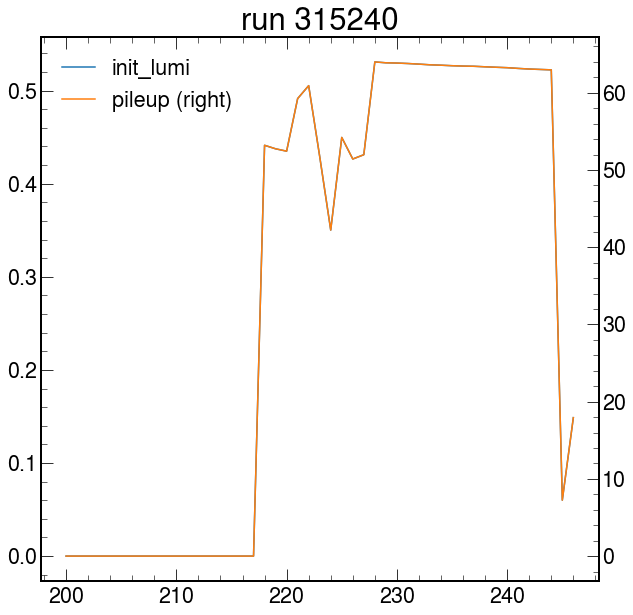

In [61]:
lumi_info=lsdf_collisions[['run_number','init_lumi', 'end_lumi',
                 'pileup',
                 'recorded_lumi', 'delivered_lumi',
                 'lumisection_number',]]
run=315240
lumi_info=lumi_info[lumi_info['run_number']== run]
lumi_info.plot(y=['init_lumi', 'pileup'],secondary_y="pileup")
# plt.yscale("log")
plt.title("run {}".format(run))

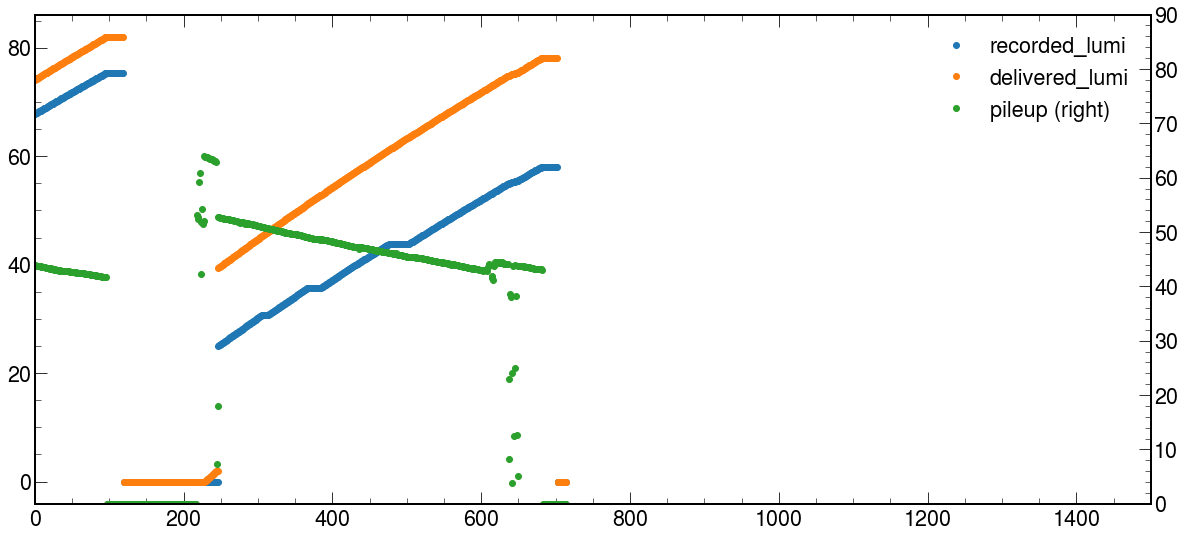

In [62]:
# lsdf_collisions.plot(y=["init_lumi","end_lumi"],figsize=(20,5),logy=False,logx=False,kind='hist',bins=1000,histtype="step")
# lsdf_collisions.plot(y=['pileup'],figsize=(20,5),logy=False,logx=False,kind='hist',bins=1000,histtype="step")
lsdf_collisions.plot(y=['recorded_lumi','delivered_lumi','pileup'],style='o',figsize=(20,9),logy=False,logx=False,secondary_y="pileup")
plt.ylim(0,90)

plt.xlim(0,1500)
plt.show()
# plt.legend(loc=)
# lsdf_collisions.plot(y=['init_lumi','end_lumi'],x='run_number' ,figsize=(19,9),logy=False,logx=False)

In [63]:
lsdf_collisions['end_lumi'] -lsdf_collisions['init_lumi']

0     -0.000365
1     -0.000415
2     -0.000323
3     -0.000240
4      0.000081
         ...   
710    0.000000
711    0.000000
712    0.000000
713    0.000000
714    0.000000
Length: 715, dtype: float64

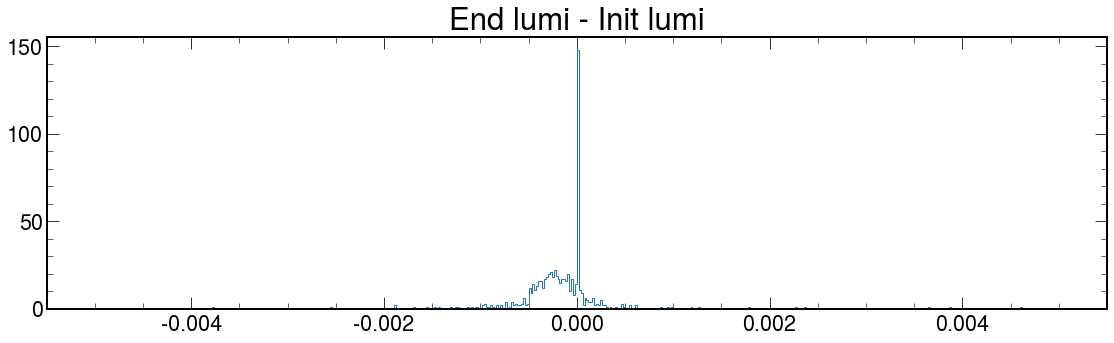

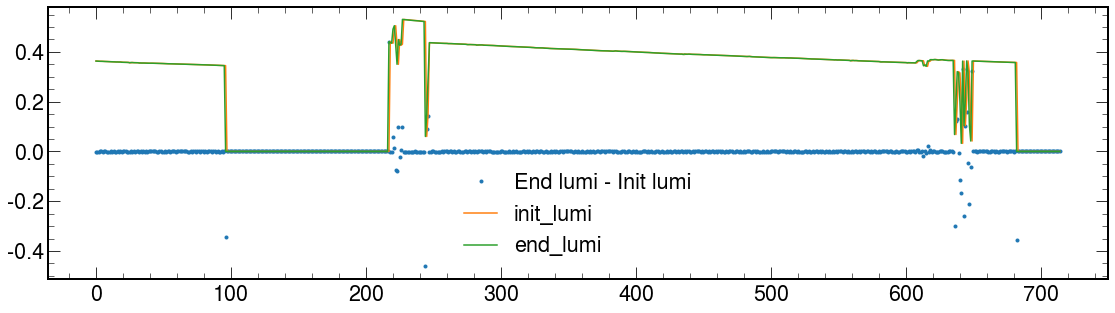

In [64]:
figsize=(19,5)
dpi=None

lumidelta=lsdf_collisions['end_lumi'] -lsdf_collisions['init_lumi']


plt.figure(figsize=figsize,dpi=dpi)
plt.title("End lumi - Init lumi")
plt.hist(lumidelta,bins=500,range=(-.005,.005),histtype="step");
plt.show()


linestyle,marker='','.'

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(lsdf_collisions.index,lumidelta,label="End lumi - Init lumi",linestyle=linestyle,marker=marker,);
# plt.show()

# plt.figure(figsize=figsize,dpi=dpi)
plt.plot(lsdf_collisions.index,lsdf_collisions.init_lumi,label='init_lumi')
plt.plot(lsdf_collisions.index,lsdf_collisions.end_lumi,label='end_lumi')
plt.legend()
plt.show()

# Plot the Run level info

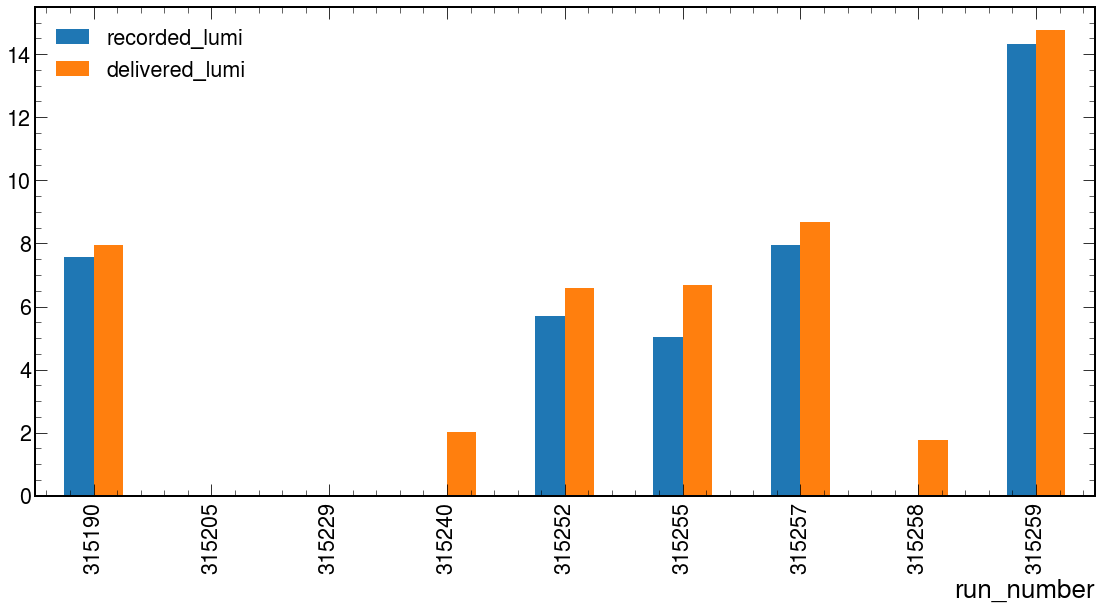

In [65]:
rundf_coll.plot(y=['recorded_lumi',"delivered_lumi"],x="run_number",
                kind="bar",figsize=(19,9),logy=False,logx=False);
# rundf_coll.plot(y='delivered_lumi');

In [66]:
rundf_coll[['run_number','recorded_lumi',"delivered_lumi"]]

,run_number,recorded_lumi,delivered_lumi
0,315190,7.581242,7.945422
9,315205,0.000000,0.000000
23,315229,0.000000,0.000000
34,315240,0.000000,2.014255
45,315252,5.699074,6.596551
48,315255,5.033584,6.689324
50,315257,7.958398,8.684852
51,315258,0.002434,1.768570
52,315259,14.328375,14.768750


# It is useful to join the different dataframes into one dictionary for easier access

First we identify the files we have and choose

In [20]:
! ls -lh *.csv

-rw-r--r--. 1 gfidalgo 1399 402K Aug 18 20:05 2018AEra_runs.csv
-rw-r--r--. 1 gfidalgo 1399 896K Nov  3 07:56 Col_Runs-17&18.csv
-rw-r--r--. 1 gfidalgo 1399  72K Nov  3 07:47 Col_Runs2018A.csv
-rw-r--r--. 1 gfidalgo 1399 300K Nov  3 07:49 Col_Runs2018.csv
-rw-r--r--. 1 gfidalgo 1399 449K Aug 18 20:05 Runs_315190-315286_LS.csv
-rw-r--r--. 1 gfidalgo 1399 7.0M Aug 19 21:54 Runs_315190-316287_LS.csv
-rw-r--r--. 1 gfidalgo 1399 9.8M Aug 23 02:16 Runs_315190-316766_LS.csv
-rw-r--r--. 1 gfidalgo 1399  705 Nov  5 06:51 table1.csv
-rw-r--r--. 1 gfidalgo 1399 7.0M Nov 10 05:53 Zerobias_rates_2018A.csv
-rw-r--r--. 1 gfidalgo 1399 119K Sep 22 19:10 Zerobias_rates_315190-315260.csv


Read them into a dictionary

In [42]:
Df_dict={}
Df_dict['runs']= pd.read_csv("Col_Runs2018A.csv")
Df_dict['lumisections']= pd.read_csv("Runs_315190-316766_LS.csv")
#pd.read_csv("Runs_315190-316766_LS.csv")

see how many run numbers we have from each 

In [43]:
print(Df_dict['runs'].nunique()['run_number'])
print(Df_dict['lumisections'].nunique()['run_number'])

135
684


Identify the non-common runs

In [21]:
miss_fromRuns=omsu.missing_runs(Df_dict['runs'],Df_dict['lumisections'],fromlumi=False)
miss_fromLumi=omsu.missing_runs(Df_dict['runs'],Df_dict['lumisections'],fromlumi=True)

Here we find the intersection of the queries so that we have information on common runs for each DF.

The rest we will drop for now.

In [37]:
intersection_runs=Df_dict["runs"].set_index("run_number").index.intersection(
    Df_dict["lumisections"].set_index("run_number").index
).to_list()

In [38]:
intersection_runs

[315190,
 315252,
 315255,
 315257,
 315258,
 315259,
 315264,
 315265,
 315267,
 315270,
 315322,
 315339,
 315357,
 315361,
 315363,
 315365,
 315366,
 315420,
 315488,
 315489,
 315490,
 315506,
 315509,
 315510,
 315512,
 315543,
 315555,
 315556,
 315557,
 315640,
 315641,
 315642,
 315644,
 315645,
 315646,
 315647,
 315648,
 315689,
 315690,
 315702,
 315703,
 315704,
 315705,
 315713,
 315721,
 315741,
 315764,
 315770,
 315784,
 315785,
 315786,
 315787,
 315788,
 315789,
 315790,
 315800,
 315801,
 315840,
 315973,
 315974,
 316058,
 316059,
 316060,
 316061,
 316062,
 316082,
 316109,
 316110,
 316111,
 316112,
 316113,
 316114,
 316151,
 316153,
 316186,
 316187,
 316199,
 316200,
 316201,
 316202,
 316216,
 316217,
 316218,
 316219,
 316239,
 316240,
 316241,
 316271,
 316361,
 316362,
 316363,
 316377,
 316378,
 316379,
 316380,
 316441,
 316455,
 316456,
 316457,
 316469,
 316470,
 316472,
 316505,
 316569,
 316590,
 316613,
 316615,
 316664,
 316665,
 316666,
 316667,
 

In [39]:
len(intersection_runs),len(miss_fromLumi),len(miss_fromRuns)

(125, 10, 559)

In [32]:
missing_runs(rundf_coll,lsdf_collisions,fromlumi=False)

[]

In [40]:
Df_dict['runs']=Df_dict['runs'].set_index("run_number").drop(miss_fromLumi).reset_index()

In [41]:
Df_dict["lumisections"] = Df_dict["lumisections"].set_index("run_number").drop(miss_fromRuns).reset_index()

In [44]:
print(Df_dict['runs'].nunique()['run_number'])
print(Df_dict['lumisections'].nunique()['run_number'])

135
684


Verify that all runs are the same

In [43]:
print(sum(Df_dict['lumisections']['run_number'].unique()  != intersection_runs))
print(sum(Df_dict['runs']['run_number'].unique()  != intersection_runs))
# If they are zero then both have exactly same runs

0
0


## Making the ranking system

Now I need to make an equation for the grading of the run
$$ G = 0.5 (\text{inst lumi }\%) \times \text{inst lumi }  + 0.25 (\text{pileup}\%)\times \text{pileup} + 0.25 (\text{run number}\%) \times \text{run number} $$

The quick fix for now (implemented in `ref_rank()` if `Trim=True`  is given) is to filter out the missing runs from the rundf.
The functions below have been created to help with this

### Some studies here for the final ranking

In [49]:
pu=get_pileup(Df_dict["lumisections"])
num_lumis= Df_dict["runs"].last_lumisection_number
ave_inst_lumin= get_avg_initLumi(Df_dict["lumisections"])

0.19404822746473918


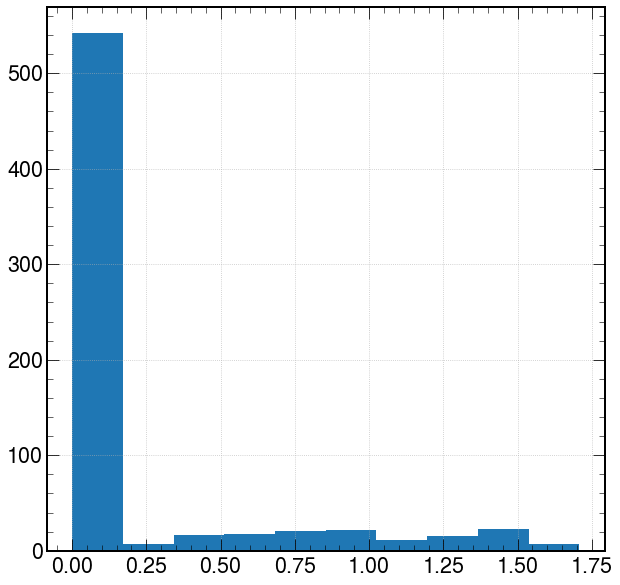

In [131]:

ave_inst_lumin.hist()
print(ave_inst_lumin.mean())
pu.hist(bins=int(pu.max())+1)
print(pu.std())
num_lumis.hist(bins=int(num_lumis.max())+1)
print(ave_inst_lumin.std())

# Testing the ranking system

Disabling pandas warnings for now

In [44]:
pd.options.mode.chained_assignment = None  # default='warn'

target=316201

RankDF=omsu.ref_rank(Df_dict,
         target,
         Trim=True) \
[['run_number',"Run_Rank",
  'run_number_delta',"run_number_delta %",
  'pileup_delta',"pileup_delta %","ave_pileup",
  "number_of_lumisections_delta","num_lumi_delta %","last_lumisection_number"
  ,"inst_lumi_delta","inst_lumi_delta %","ave_inst_lumi",
  'Fill location',"fill_number","l1_hlt_mode"]] \
.set_index('run_number') \
.sort_values(by=["Run_Rank","inst_lumi_delta %",'pileup_delta %','run_number_delta'], key=lambda x: x.abs(),ascending=True)

RankDF #.loc[[316187,315713,315705]]

Trimming dataframes

Target run : 316201
Fill location : (5/6)
Fill number : 6675.0
average pileup : 26.85062001015781
last lumi : 498.0
avg inst lumi : 0.9598289318145956
L1 HLT mode : collisions2018


,Run_Rank,run_number_delta,run_number_delta %,pileup_delta,pileup_delta %,ave_pileup,number_of_lumisections_delta,num_lumi_delta %,last_lumisection_number,inst_lumi_delta,inst_lumi_delta %,ave_inst_lumi,Fill location,fill_number,l1_hlt_mode
run_number,,,,,,,,,,,,,,,
315488,-0.840302,713,-0.225489,16.373502,60.979979,43.224122,615.0,123.493976,1113.0,-0.025944,-2.703017,9.338846e-01,(2/4),6628.0,collisions2018
316187,2.317872,14,-0.004428,1.173742,4.371376,28.024362,1579.0,317.068273,2077.0,0.041958,4.371389,1.001787e+00,(5/5),6674.0,collisions2018
316060,-4.198483,141,-0.044592,-2.126066,-7.918126,24.724554,437.0,87.751004,935.0,-0.076000,-7.918126,8.838285e-01,(11/13),6662.0,collisions2018
315543,-4.397025,658,-0.208095,6.373082,23.735325,33.223702,-318.0,-63.855422,180.0,-0.085089,-8.865017,8.747399e-01,(2/2),6633.0,collisions2018
316114,-4.684759,87,-0.027514,-2.372311,-8.835219,24.478309,1151.0,231.124498,1649.0,-0.084803,-8.835219,8.750259e-01,(12/12),6666.0,collisions2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315465,-53.023693,736,-0.232763,-26.850620,-100.000000,0.000000,-389.0,-78.112450,109.0,-0.959829,-100.000000,0.000000e+00,(9/10),6625.0,cosmics2018
315412,-53.023693,789,-0.249525,-26.850620,-100.000000,0.000000,-350.0,-70.281124,148.0,-0.959829,-100.000000,0.000000e+00,(2/6),6623.0,circulating2018
315407,-53.023693,794,-0.251106,-26.850620,-100.000000,0.000000,-329.0,-66.064257,169.0,-0.959829,-100.000000,0.000000e+00,(1/6),6623.0,cosmics2018


In [44]:
RankDF.shape

(105, 15)

In [108]:
RankDF.reset_index().loc[
    [i for i,seqi in enumerate(RankDF.index) if seqi == 315713 or seqi == 315705 or seqi == 316187]
]

,run_number,Run_Rank,run_number_delta,run_number_delta %,pileup_delta,pileup_delta %,ave_pileup,number_of_lumisections_delta,num_lumi_delta %,last_lumisection_number,inst_lumi_delta,inst_lumi_delta %,ave_inst_lumi,Fill location,fill_number,l1_hlt_mode
1,316187,2.220792,14,-0.004428,1.173742,4.371376,28.024362,1579,317.068273,2077,0.041958,4.371389,1.001787,(2/2),6674,collisions2018
13,315705,-13.583785,496,-0.156862,-4.652014,-17.325535,22.198606,212,42.570281,710,-0.196252,-20.446553,0.763577,(4/4),6640,collisions2018
35,315713,16.077981,488,-0.154332,13.170078,49.049438,40.020698,634,127.309237,1132,0.416784,43.422719,1.376613,(1/1),6641,collisions2018


In [101]:
RankDF.sort_values("Run_Rank",key=lambda x: x.abs(),ascending=True)\
.loc[[315713,315705]]

,Run_Rank,run_number_delta,run_number_delta %,pileup_delta,pileup_delta %,ave_pileup,number_of_lumisections_delta,num_lumi_delta %,last_lumisection_number,inst_lumi_delta,inst_lumi_delta %,ave_inst_lumi,Fill location,fill_number,l1_hlt_mode
run_number,,,,,,,,,,,,,,,
315713,16.077981,488,-0.154332,13.170078,49.049438,40.020698,634,127.309237,1132,0.416784,43.422719,1.376613,(1/1),6641,collisions2018
315705,-13.583785,496,-0.156862,-4.652014,-17.325535,22.198606,212,42.570281,710,-0.196252,-20.446553,0.763577,(4/4),6640,collisions2018


In [145]:
RankDF.inst_lumi_delta.max()

0.7051708415494589

##  Let's see the Json used in the Cert. Helper

In [5]:
target=316201


In [6]:
RefRunDf=pd.read_json("allRunsRefRuns.json")

RefRunDf[RefRunDf.dataset.str.contains("UL")]\
.sort_values("run_number").loc[RefRunDf.run_number < target]

,run_number,run_reconstruction_type,reference_run_number,reference_run_reconstruction_type,dataset
3955,272760,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3956,272761,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3957,272762,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3959,272774,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3962,272775,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
...,...,...,...,...,...
3695,316110,rerecoul,316505,rerecoul,/ReReco/Run2018A_UL2019/DQM
3694,316114,rerecoul,316505,rerecoul,/ReReco/Run2018A_UL2019/DQM
3693,316151,rerecoul,316505,rerecoul,/ReReco/Run2018A_UL2019/DQM
3692,316186,rerecoul,316505,rerecoul,/ReReco/Run2018A_UL2019/DQM


In [33]:
RefRunDf.sort_values("run_number")

,run_number,run_reconstruction_type,reference_run_number,reference_run_reconstruction_type,dataset
268,136096,express,315777,express,/StreamExpressCosmics/Run2018A-Express-v1/DQMIO
3955,272760,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3956,272761,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3957,272762,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
3959,272774,rerecoul,272022,rerecoul,/ReReco/Run2016B_UL2020/DQM
...,...,...,...,...,...
4343,344679,prompt,344134,prompt,/PromptReco/Cosmics21CRUZET/DQM
4320,344680,express,344134,prompt,/Express/Cosmics2021CRUZET/DQM
4344,344680,prompt,344134,prompt,/PromptReco/Cosmics21CRUZET/DQM
4345,344681,prompt,344134,prompt,/PromptReco/Cosmics21CRUZET/DQM


In [34]:
unwanted_datasets=[x for x in RefRunDf.dataset.unique().tolist() if "ZeroBias/Run" not in x]

In [35]:
RefRunDf_skim = RefRunDf.set_index("dataset").drop(unwanted_datasets).reset_index()

In [37]:
RefRunDf_skim[RefRunDf_skim.run_number < 316201]

,dataset,run_number,run_reconstruction_type,reference_run_number,reference_run_reconstruction_type
0,/ZeroBias/Run2018A-PromptReco-v1/DQMIO,315257,prompt,315189,prompt
1,/ZeroBias/Run2018A-PromptReco-v1/DQMIO,315640,prompt,315189,prompt
2,/ZeroBias/Run2018A-PromptReco-v1/DQMIO,315641,prompt,315189,prompt
3,/ZeroBias/Run2018A-PromptReco-v1/DQMIO,315642,prompt,315189,prompt
4,/ZeroBias/Run2018A-PromptReco-v1/DQMIO,315644,prompt,315189,prompt
...,...,...,...,...,...
641,/ZeroBias/Run2018A-17Sep2018-v1/DQMIO,316109,rereco,315257,rereco
642,/ZeroBias/Run2018A-17Sep2018-v1/DQMIO,316113,rereco,315257,rereco
643,/ZeroBias/Run2018A-17Sep2018-v1/DQMIO,316153,rereco,315257,rereco
644,/ZeroBias/Run2018A-17Sep2018-v1/DQMIO,316199,rereco,315257,rereco


In [214]:
RefRunDf.set_index("run_number").loc[[316201]]

,run_reconstruction_type,reference_run_number,reference_run_reconstruction_type,dataset
run_number,,,,
316201,express,315713,express,/StreamExpress/Run2018A-Express-v1/DQMIO
316201,prompt,315705,prompt,/ZeroBias/Run2018A-PromptReco-v1/DQMIO


# To do

- [x] Add a delta relative (signed) Percentage of difference
- [x] Add filter for collisions only
- [x] Add filter if run has 0 Rec Lumi
- [ ] Add Zerobias rate to DF
    - [ ] Add delta relative rate (signed) 
- [ ] Add flags from RunReg
- [ ] Give Anushree all 2018 inst. luminosity and zerobias rate per lumisection
- [ ] Take ZeroBias query and give only like 5 runs
- [ ] CrossCheck in OMS some collision run that is NOT return by the API




delta relative is 

$$\frac{ run_{qty} -target_{qty} }{target_{qty}}\times 100$$

# Exploration and developing area

### Get only collisions  with >0 Recorded lumi by query

```python
# - extrafilters: list of extra filters (apart from run number),
#   each filter is supposed to be a dict of the form {'attribute_name':<name>,'value':<value>,'operator':<operator>}
#   where <name> must be a valid field name in the OMS data, <value> its value, and <operator> chosen from "EQ", "NEQ", "LT", "GT", "LE", "GE" or "LIKE"
```

In [30]:
# example: get run information for a single run

runnb = (294916,325310) # RUN II
attributes=['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update','recorded_lumi', 'delivered_lumi','energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'fill_type_party2','fill_type_party1', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam','hlt_physics_counter']
filters=[{'attribute_name':'l1_hlt_mode',
         'value':'collisions',
         'operator':'LIKE'},
        {'attribute_name':'recorded_lumi',
         'value':0,
         'operator':'GT'}]
run_info = get_oms_data( omsapi, 'runs', runnb ,limit_entries=15_000,attributes=attributes,extrafilters=filters)
# print(run_info)

https://vocms0185.cern.ch/agg/api/v1/runs/?fields=fill_type_party1,l1_rate,hlt_physics_throughput,components,l1_triggers_counter,hlt_physics_counter,run_number,duration,l1_menu,hlt_physics_rate,l1_hlt_mode_stripped,fill_type_party2,last_lumisection_number,hlt_physics_size,end_lumi,fill_type_runtime,last_update,start_time,delivered_lumi,l1_key,fill_number,trigger_mode,end_time,energy,l1_hlt_mode,l1_key_stripped,init_lumi,hlt_key,recorded_lumi,sequence,stable_beam,initial_prescale_index&filter[run_number][GE]=294916&filter[run_number][LE]=325310&filter[l1_hlt_mode][LIKE]=collisions&filter[recorded_lumi][GT]=0&page[offset]=0&page[limit]=15000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=fill_type_party1,l1_rate,hlt_physics_throughput,components,l1_triggers_counter,hlt_physics_counter,run_number,duration,l1_menu,hlt_physics_rate,l1_hlt_mode_stripped,fill_type_party2,last_lumisection_number,hlt_physics_size,end_lumi,fill_type_runtime,last_update,start_time,delivered_lumi,l1_key,fill_nu

In [31]:
col_runs=convert_check_addFillLoc(run_info)
col_runs[["run_number",'recorded_lumi', 'delivered_lumi',"l1_hlt_mode",'hlt_key']]

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,run_number,recorded_lumi,delivered_lumi,l1_hlt_mode,hlt_key
0,294927,0.002692,0.004132,collisions2017,/cdaq/physics/firstCollisions17/v3.0/HLT/V2
1,294928,0.003717,0.005546,collisions2017,/cdaq/physics/firstCollisions17/v3.0/HLT/V2
2,294929,0.003303,0.007306,collisions2017,/cdaq/physics/firstCollisions17/v3.0/HLT/V2
3,294931,0.003580,0.005224,collisions2017,/cdaq/physics/firstCollisions17/v3.0/HLT/V2
4,294932,0.003363,0.004979,collisions2017,/cdaq/physics/firstCollisions17/v3.0/HLT/V2
...,...,...,...,...,...
1666,325168,4.264391,7.692555,collisions2018,/cdaq/physics/Run2018/2e34/v3.6.1/HLT/V2
1667,325169,5.546852,9.097055,collisions2018,/cdaq/physics/Run2018/2e34/v3.6.1/HLT/V2
1668,325170,265.164055,275.800922,collisions2018,/cdaq/physics/Run2018/2e34/v3.6.1/HLT/V2
1669,325172,68.954438,72.939688,collisions2018,/cdaq/physics/Run2018/2e34/v3.6.1/HLT/V2


In [32]:
col_runs.shape

(1671, 33)

# Get ZeroBias rates and plot with pileup

In [49]:
ls

2018AEra_runs.csv          Runs_315190-316287_LS.csv
allRunsRefRuns.json        Runs_315190-316766_LS.csv
Col_Runs-17&18.csv         table1.csv
Col_Runs2018A.csv          table1.tex
Col_Runs2018.csv           test.tex
Guillermo OMS work.ipynb   Zerobias_rates_2018A.csv
Legacy2018Golden.json      Zerobias_rates_315190-315260.csv
Runs_315190-315286_LS.csv


In [110]:
# # get the omsapi instance

omsapi = get_oms_api()

# example: get run information for a single run

runnb = (315190,316996) # 2018A
# runnb= 302328
extrafilter={"attribute_name":"dataset_name",'value':'ZeroBias','operator':'EQ'}

attributes =['start_time', 'last_lumisection_number', 'rate', 'run_number',
       'last_lumisection_in_run', 'first_lumisection_number', 'dataset_name',
       'cms_active', 'events']

# Datasets_info = get_oms_data( omsapi, 'datasetrates', runnb ,limit_entries=100_000,
#                              extrafilters=[extrafilter])


In [ ]:
dataset_ratesDF=makeDF(Datasets_info)
Df_dict["dataset_rates"]=dataset_ratesDF
# dataset_ratesDF.to_csv("Zerobias_rates_2018A.csv",index=False)

In [48]:
Df_dict["dataset_rates"] = pd.read_csv("Zerobias_rates_2018A.csv")

In [49]:
Df_dict["dataset_rates"].set_index("run_number")

,start_time,last_lumisection_number,rate,last_lumisection_in_run,first_lumisection_number,dataset_name,cms_active,events
run_number,,,,,,,,
315190,2018-04-26T06:32:38Z,10,108.320705,115.0,10,ZeroBias,True,2525
315190,2018-04-26T06:33:02Z,11,102.958294,115.0,11,ZeroBias,True,2400
315190,2018-04-26T06:33:25Z,12,102.700898,115.0,12,ZeroBias,True,2394
315190,2018-04-26T06:33:48Z,13,101.413919,115.0,13,ZeroBias,True,2364
315190,2018-04-26T06:34:12Z,14,105.231956,115.0,14,ZeroBias,True,2453
...,...,...,...,...,...,...,...,...
316995,2018-05-28T09:12:24Z,634,10.681923,638.0,634,ZeroBias,True,249
316995,2018-05-28T09:12:47Z,635,10.424527,638.0,635,ZeroBias,True,243
316995,2018-05-28T09:13:10Z,636,9.909736,638.0,636,ZeroBias,True,231


In [59]:
Df_dict["dataset_rates"].nunique()["run_number"]

557

In [61]:
# len(rundf_coll.run_number),
len(Df_dict["lumisections"].run_number.unique()),len(Df_dict["dataset_rates"].run_number.unique())
# len(lsdf_collisions.run_number.unique()),


(684, 557)

check if runs in the `dataset_ratesDF` are also in `runs` dataframe

In [50]:
RunColl_df,ZeroBiasColl_df=get_collisions(Df_dict["runs"],Df_dict["dataset_rates"])

In [51]:
miss_fromLumi=missing_runs(RunColl_df,ZeroBiasColl_df,fromlumi=True)
miss_fromRuns=missing_runs(RunColl_df,ZeroBiasColl_df,fromlumi=False)

In [52]:
# filter out missing runs
runs_skim= RunColl_df.set_index("run_number").drop(miss_fromLumi).reset_index()
Zerobias_skim = ZeroBiasColl_df.set_index("run_number").drop(miss_fromRuns).reset_index()

In [53]:
runs_skim.head()

,run_number,components,l1_hlt_mode_stripped,l1_key,duration,l1_triggers_counter,hlt_physics_throughput,init_lumi,last_update,recorded_lumi,...,start_time,hlt_physics_size,fill_type_runtime,hlt_key,last_lumisection_number,l1_rate,l1_menu,stable_beam,hlt_physics_counter,Fill location
0,315190,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v66,l1_trg_collisions2018/v9,2733,139241030.0,1.124304,0.363444,2018-04-26T08:25:04Z,7.581242,...,2018-04-26T06:28:12Z,3013.917,PROTONS,/cdaq/physics/firstCollisions18/v1.9/HLT/V2,115.0,51943.050,L1Menu_Collisions2018_0_0_1,True,3739568.0,(1/1)
1,315259,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v73,l1_trg_collisions2018/v10,4324,114614774.0,0.512709,0.377165,2018-04-27T00:02:01Z,14.328375,...,2018-04-26T21:53:56Z,2199.068,PROTONS,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V4,184.0,26722.725,L1Menu_Collisions2018_0_0_1,True,2723099.0,(42/42)
2,315264,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v74,l1_trg_collisions2018/v10,6119,295208405.0,1.075522,0.842940,2018-04-27T05:19:53Z,39.385570,...,2018-04-27T02:32:42Z,6493.351,PROTONS,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,261.0,48897.560,L1Menu_Collisions2018_0_0_1,True,6371642.0,(3/9)
3,315267,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v74,l1_trg_collisions2018/v10,5716,232524561.0,0.865909,0.685031,2018-04-27T07:38:12Z,36.354441,...,2018-04-27T04:58:29Z,4925.064,PROTONS,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,244.0,40882.477,L1Menu_Collisions2018_0_0_1,True,5422021.0,(6/9)
4,315270,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v74,l1_trg_collisions2018/v10,15291,512411982.0,0.579569,0.611140,2018-04-27T07:53:08Z,78.149695,...,2018-04-27T06:43:28Z,8849.044,PROTONS,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,655.0,33561.880,L1Menu_Collisions2018_0_0_1,True,11451299.0,(8/9)


In [56]:
Zerobias_skim.nunique()

run_number                     98
start_time                  60326
last_lumisection_number      2208
rate                         2236
last_lumisection_in_run        97
first_lumisection_number     2208
dataset_name                    1
cms_active                      2
events                       2236
dtype: int64

Store it in a csv

### Get HLT Rate per Lumisection (luka has it)

In [102]:
Zerobias_skim.run_number.unique()

array([315190, 315252, 315255, 315257, 315259, 315264, 315265, 315267,
       315270, 315273, 315300, 315320, 315322, 315339, 315343, 315345,
       315346, 315349, 315350, 315357, 315361, 315363, 315365, 315366,
       315390, 315402, 315403, 315404, 315405, 315406, 315420, 315447,
       315488, 315489, 315490, 315499, 315506, 315509, 315510, 315512,
       315533, 315543, 315554, 315555, 315556, 315557, 315633, 315640,
       315642, 315644, 315645, 315646, 315647, 315648, 315687, 315689,
       315690, 315702, 315703, 315704, 315705, 315713, 315721, 315741,
       315764, 315770, 315775, 315784, 315785, 315786, 315787, 315790,
       315800, 315801, 315840, 315973, 315974, 316058, 316059, 316060,
       316061, 316062, 316082, 316095, 316109, 316110, 316111, 316113,
       316114, 316142, 316144, 316153, 316186, 316187, 316199, 316200,
       316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240,
       316241, 316260, 316262, 316271, 316360, 316361, 316362, 316363,
      

In [131]:
run = 315499

In [112]:
runs_skim.set_index('run_number').loc[[run]]

,components,l1_hlt_mode_stripped,l1_key,duration,l1_triggers_counter,hlt_physics_throughput,init_lumi,last_update,recorded_lumi,delivered_lumi,...,start_time,hlt_physics_size,fill_type_runtime,hlt_key,last_lumisection_number,l1_rate,l1_menu,stable_beam,hlt_physics_counter,Fill location
run_number,,,,,,,,,,,,,,,,,,,,,
315499,"['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...",collisions2018/v88,l1_trg_collisions2018/v13,933,695937.0,0.002194,0.0,2018-05-01T10:01:12Z,0.0,0.0,...,2018-05-01T08:11:56Z,1.994,PROTONS,/cdaq/physics/Run2018/2e34/v1.2.2/HLT/V2,39.0,765.532,L1Menu_Collisions2018_0_0_1,False,20534.0,(3/8)


In [113]:
Zerobias_skim.set_index('run_number').loc[run]

,start_time,last_lumisection_number,rate,last_lumisection_in_run,first_lumisection_number,dataset_name,cms_active,events
run_number,,,,,,,,
315499,2018-05-01T08:16:33Z,11,10.853520,39.0,11,ZeroBias,True,253
315499,2018-05-01T08:16:57Z,12,9.823937,39.0,12,ZeroBias,True,229
315499,2018-05-01T08:17:20Z,13,9.695239,39.0,13,ZeroBias,True,226
315499,2018-05-01T08:17:43Z,14,9.823937,39.0,14,ZeroBias,True,229
315499,2018-05-01T08:18:06Z,15,9.866836,39.0,15,ZeroBias,True,230
315499,2018-05-01T08:18:30Z,16,28.528027,39.0,16,ZeroBias,True,665
315499,2018-05-01T08:18:53Z,17,30.158200,39.0,17,ZeroBias,True,703
315499,2018-05-01T08:19:16Z,18,29.300214,39.0,18,ZeroBias,True,683
315499,2018-05-01T08:19:40Z,19,31.402280,39.0,19,ZeroBias,True,732


<AxesSubplot:xlabel='first_lumisection_number'>

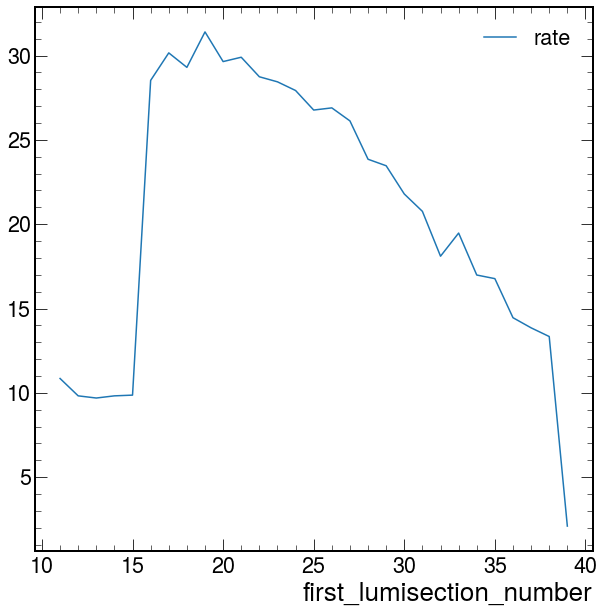

In [129]:
Zerobias_skim.set_index('run_number').loc[run].plot(x='first_lumisection_number',y ='rate',
                                                    kind="line")

<AxesSubplot:title={'center':'315499'}>

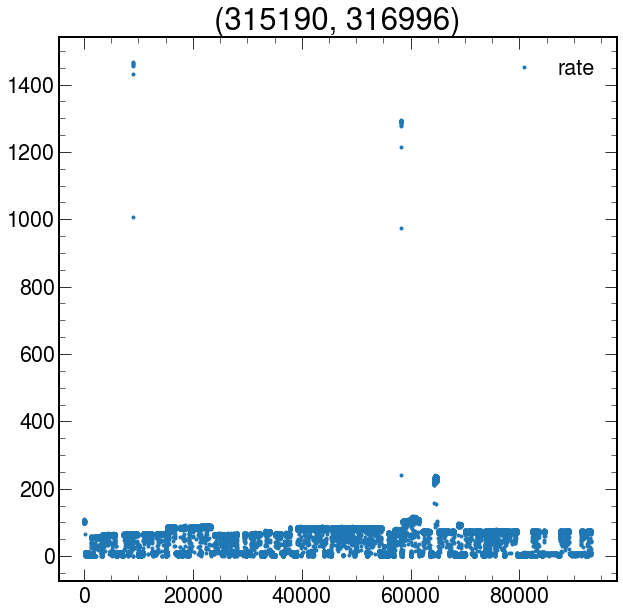

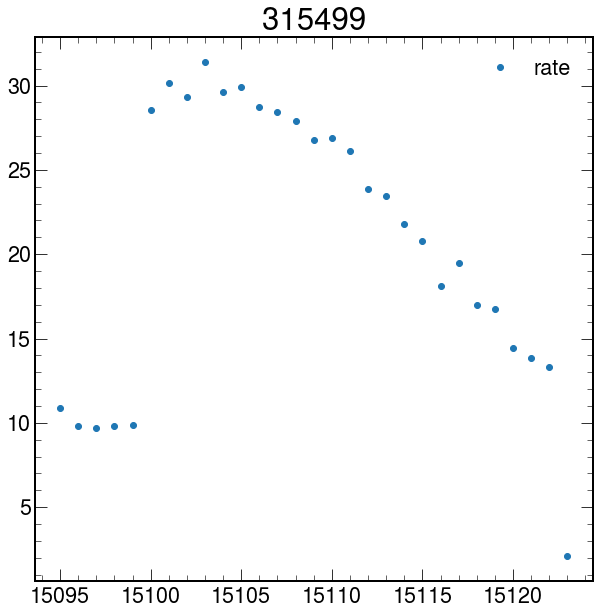

In [130]:
if isinstance(runnb,tuple):
    dataset_ratesDF.plot(y='rate',style='.',title="{}".format(runnb))
else:
    run=run
dataset_ratesDF[dataset_ratesDF["run_number"]==run].plot(y='rate',style='o',title="{}".format(run),)
    

Text(0.5, 1.0, '315190')

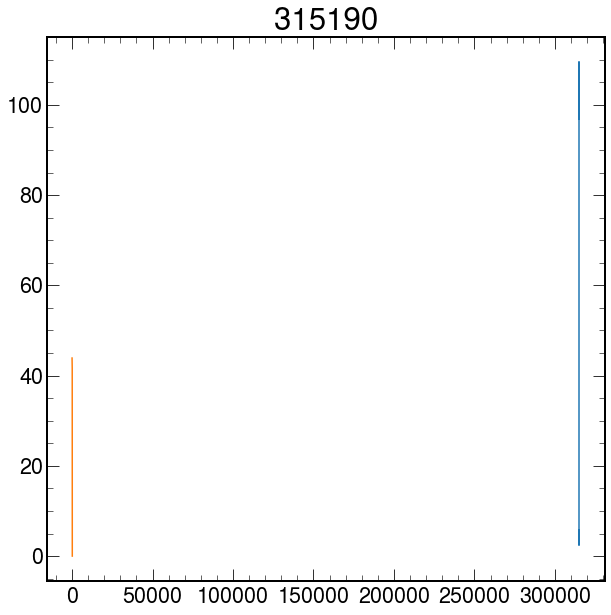

In [292]:
plt.plot(
         Df_dict["dataset_rates"].set_index('run_number').loc[run].rate,label='ZeroBias Rate')
plt.plot(lsdf_collisions.set_index(['run_number']).loc[run].lumisection_number,
         lsdf_collisions.set_index(['run_number']).loc[315190].pileup,label='Pileup')
plt.title("{}".format(run))

# Df_dict['dataset_rates']

# Run Registry API

In [39]:
import runregistry

In [27]:

import runregistry

datasets = runregistry.get_datasets(
  filter={
  "and": [
    {"triplet_summary.tracker-track.GOOD": {">": 0}},
    {"triplet_summary.tracker-pixel.GOOD": {">": 0}},
    {"triplet_summary.tracker-strip.GOOD": {">": 0}},
    {"oms_attributes.ls_duration": {">": 100}},
    {"rr_attributes.class": {"like": "%Collisions%"}},
    {"run_number": {">=": "297000"}},
    {"dataset_attributes.tracker_state": {"=": "COMPLETED"}}
  ],
  "name": {"and": [{"<>": "online"}]},
  "dataset_attributes.tracker_state": {
    "and": [{"or": [{"=": "OPEN"}, {"=": "SIGNOFF"}, {"=": "COMPLETED"}]}]
  }
}, 
  ignore_filter_transformation=True
)


In [57]:
import pickle

In [58]:
# pickle.dump(datasets,open("RR.pkl","wb"))

In [59]:
temp_pfile=pickle.load(open("RR.pkl",'rb'))

In [37]:
temp_pfile[0]

{'class': 'Collisions21Special',
 'state': 'SIGNOFF',
 'significant': True,
 'stop_reason': '',
 'run_needs_to_be_updated_manually': True,
 'run_number': 346512,
 'name': '/PromptReco/CollisionsSpecial2021/DQM',
 'dataset_attributes': {'dc_state': 'OPEN',
  'dt_state': 'COMPLETED',
  'cms_state': 'OPEN',
  'csc_state': 'COMPLETED',
  'gem_state': 'COMPLETED',
  'hlt_state': 'COMPLETED',
  'l1t_state': 'COMPLETED',
  'rpc_state': 'COMPLETED',
  'tau_state': 'OPEN',
  'btag_state': 'OPEN',
  'ecal_state': 'COMPLETED',
  'hcal_state': 'COMPLETED',
  'lumi_state': 'OPEN',
  'muon_state': 'COMPLETED',
  'appeared_in': [],
  'ctpps_state': 'OPEN',
  'castor_state': 'OPEN',
  'egamma_state': 'COMPLETED',
  'global_state': 'COMPLETED',
  'jetmet_state': 'COMPLETED',
  'tracker_state': 'COMPLETED'},
 'datasets_in_gui': ['/ZeroBias14/Commissioning2021-PromptReco-v1/DQMIO',
  '/MinimumBias9/Commissioning2021-PromptReco-v1/DQMIO',
  '/ZeroBias8/Commissioning2021-PromptReco-v1/DQMIO',
  '/MinimumBi

In [25]:
for i in range(100):
    print(    temp_pfile[i]['lumisections']["tracker-strip"])
    


{'GOOD': 642, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 499, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 506, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 169, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 119, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 372, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 124, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 307, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 472, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 223, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 123, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 75, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 204, 'EMPTY': 0, 'causes': [], 'comments': []}
{'GOOD': 260, 'EMPTY': 0, 'causes': ['UNDEF'], 'comments': []}
{'GOOD': 1070, 'EMPTY': 0, 'causes': ['UNDEF'], 'comments': []}
{'GOOD': 1485, 'EMPTY': 0, 'causes': ['UNDEF'], 'comments': []}
{'GOOD': 259, 'EMPTY': 0, 'causes': ['UNDEF'], 'comments': []}
{'GOOD': 158, 'EMPT

In [19]:
for i in temp_pfile[0].keys():
    print(i)

class
state
significant
stop_reason
run_needs_to_be_updated_manually
run_number
name
dataset_attributes
datasets_in_gui
deleted
version
lumisections


In [40]:
lumisections = runregistry.get_lumisections(327743, "/PromptReco/HICosmics18A/DQM")

In [43]:
lumisections[0]

{'dt-dt': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'rpc-hv': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'rpc-lv': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'cms-cms': {'cause': 'UNDEF', 'status': 'BAD', 'comment': ''},
 'csc-csc': {'cause': 'UNDEF', 'status': 'EXCLUDED', 'comment': ''},
 'csc-mem': {'cause': 'UNDEF', 'status': 'NOTSET', 'comment': ''},
 'csc-mep': {'cause': 'UNDEF', 'status': 'NOTSET', 'comment': ''},
 'ecal-es': {'cause': 'UNDEF', 'status': 'EXCLUDED', 'comment': ''},
 'hcal-hb': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'hcal-he': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'hcal-hf': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'hlt-hlt': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'hlt-tau': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'l1t-jet': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'l1t-l1t': {'cause': 'UNDEF', 'status': 'GOOD', 'comment': ''},
 'rpc-feb': {'caus

In [47]:
len(lumisections)

812

In [37]:
for i in lumisections[0].keys():
    print(i)

dt-dt
rpc-hv
rpc-lv
cms-cms
csc-csc
csc-mem
csc-mep
ecal-es
hcal-hb
hcal-he
hcal-hf
hlt-hlt
hlt-tau
l1t-jet
l1t-l1t
rpc-feb
rpc-rpc
tau-tau
csc-ddus
ecal-ebm
ecal-ebp
ecal-eem
ecal-eep
ecal-esm
ecal-esp
ecal-tpg
hcal-ho0
l1t-muon
rpc-elog
btag-btag
csc-csctf
ecal-ecal
hcal-hbls
hcal-hcal
hcal-hels
hcal-hfls
hcal-ho12
hlt-bjets
hlt-muons
l1t-l1tmu
lumi-lumi
muon-muon
rpc-noise
csc-strips
csc-timing
dc-lowlumi
ecal-laser
ecal-noise
hcal-ho0ls
hlt-global
hlt-jetmet
ctpps-ctpps
ecal-timing
hcal-ho12ls
hlt-photons
l1t-e_gamma
l1t-hf_tech
l1t-l1tcalo
l1t-muon_dt
csc-gasgains
csc-segments
l1t-bcs_tech
l1t-hf_rings
l1t-muon_csc
l1t-muon_rpc
l1t-rpc_tech
l1t-software
castor-castor
csc-integrity
csc-occupancy
csc-pedestals
csc-triggerpe
dt-dt_private
ecal-analysis
egamma-egamma
hlt-electrons
hlt-technical
jetmet-jetmet
l1t-bptx_tech
tracker-pixel
tracker-strip
tracker-track
csc-efficiency
csc-resolution
ctpps-rp45_210
ctpps-rp45_220
ctpps-rp45_cyl
ctpps-rp56_210
ctpps-rp56_220
ctpps-rp56_cyl
eca

In [38]:
lumisections_ranges = runregistry.get_lumisection_ranges(327743, "/PromptReco/HICosmics18A/DQM")

In [46]:
lumisections_ranges[0]["end"]

812

In [62]:
runs = runregistry.get_runs(filter={
   'run_number':{
      'or': [328762, 323555, 323444]
    }
})

In [99]:

datasets = runregistry.get_datasets(
  filter={
  "and": [
    {"triplet_summary.tracker-strip.GOOD": {">": 220}},
    {"name": {"like": "%UL%"}},
    {"triplet_summary.tracker-track.GOOD": {">": 110}},
    {"triplet_summary.tracker-pixel.GOOD": {">": 110}},
    {"oms_attributes.ls_duration": {">": 100}},
    {"dataset_attributes.tracker_state": {"=": "COMPLETED"}}
  ],
  "name": {"and": [{"<>": "online"}]},
  "dataset_attributes.tracker_state": {
    "and": [{"or": [{"=": "OPEN"}, {"=": "SIGNOFF"}, {"=": "COMPLETED"}]}]
  }
}, 
  ignore_filter_transformation=True
)

In [100]:
datasets[0].keys()

dict_keys(['class', 'state', 'short_run', 'significant', 'stop_reason', 'run_number', 'name', 'dataset_attributes', 'datasets_in_gui', 'deleted', 'version', 'lumisections'])

In [102]:
datasets[2]["lumisections"]["tracker-strip"]

{'GOOD': 1642, 'EMPTY': 0, 'causes': [], 'comments': []}

In [103]:
len(datasets)

720